# Part I - (Prosper Loan Data Exploration)
## by (Michael Woo)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
loan.dropna(subset=['ProsperRating (Alpha)', 'BorrowerAPR'], inplace=True)

In [5]:
loan.drop(columns=['CreditGrade',
                   'ClosedDate',
                   'GroupKey',
                   'LoanFirstDefaultedCycleNumber',
                   'TotalProsperLoans',
                   'TotalProsperPaymentsBilled',
                   'OnTimeProsperPayments',
                   'ProsperPaymentsLessThanOneMonthLate',
                   'ProsperPaymentsOneMonthPlusLate',
                   'ProsperPrincipalBorrowed',
                   'ProsperPrincipalOutstanding',
                   'ScorexChangeAtTimeOfListing',
                   'LoanFirstDefaultedCycleNumber'], inplace=True)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             8485

In [7]:
loan.describe()

ListingNumber          Term   BorrowerAPR  BorrowerRate   LenderYield  \
count   8.485300e+04  84853.000000  84853.000000  84853.000000  84853.000000   
mean    7.738749e+05     42.486135      0.226658      0.196022      0.186017   
std     2.363387e+05     11.640346      0.079916      0.074631      0.074631   
min     4.162750e+05     12.000000      0.045830      0.040000      0.030000   
25%     5.580860e+05     36.000000      0.163280      0.135900      0.125900   
50%     7.392460e+05     36.000000      0.219450      0.187500      0.177500   
75%     9.794360e+05     60.000000      0.292540      0.257400      0.247400   
max     1.255725e+06     60.000000      0.423950      0.360000      0.340000   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count             84853.000000   84853.000000     84853.000000   
mean                  0.168661       0.080306         0.096068   
std                   0.068467       0.046764         0.030403   
min                  -0.182700       0.004900        -0.182700   
25%                   0.115670       0.042400         0.074080   
50%                   0.161500       0.072400         0.091700   
75%                   0.224300       0.112000         0.116600   
max                   0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...    84853.000000   
mean                  4.072243      5.950067  ...      -54.642104   
std                   1.673227      2.376501  ...       59.729078   
min                   1.000000      1.000000  ...     -589.950000   
25%                   3.000000      4.000000  ...      -72.300000   
50%                   4.000000      6.000000  ...      -34.900000   
75%                   5.000000      8.000000  ...      -14.280000   
max                   7.000000     11.000000  ...        3.010000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count       84853.000000           84853.000000         84853.000000   
mean           -8.206068             376.088798           367.724881   
std            75.185535            1720.769115          1700.211129   
min         -4865.080000             -94.200000          -504.410000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                     84853.000000   84853.000000     84853.000000   
mean                          7.647064       0.998098         0.017560   
std                         119.165278       0.020742         0.187963   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                        7780.030000       1.012500        19.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount     Investors  
count                84853.000000                 84853.000000  84853.000000  
mean                     0.008049                     4.315558     68.264669  
std                      0.109721                   117.005989     95.195831  
min                      0.000000                     0.000000      1.000000  
25%                      0.000000                     0.000000      1.000000  
50%                      0.000000                     0.000000     32.000000  
75%                      0.000000                     0.000000     97.000000  
max                      9.000000                 11000.000000   1189.000000  

[8 rows x 52 columns]

In [8]:
loan['ProsperRating (Alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

### What is the structure of your dataset?

> After wrangling there are 84,853 loans in the dataset with 69 features. Most variables are numeric, a few are ordered factor variables, and a few are not ordered. For example, the ProperRating (Alpha) levels are ordered as, from the best to the worst, AA, A, B, C, D, E, HR.

### What is/are the main feature(s) of interest in your dataset?

> Prosper rating and borrower rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are so many features in the dataset, and all of them may help support the investigation, just have to learn while doing.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [9]:
base_color = sb.color_palette()[0]

In [10]:
pratings = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
pratings_order = pd.CategoricalDtype(ordered=True, categories=pratings)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(pratings_order)

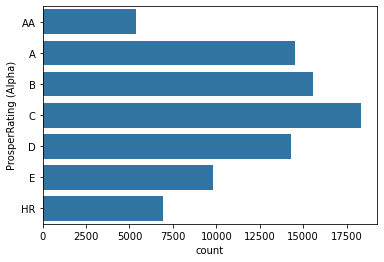

In [11]:
sb.countplot(data=loan, y='ProsperRating (Alpha)', color=base_color);

In [12]:
income_ranges = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed']
income_ranges_order = pd.CategoricalDtype(ordered=True, categories=income_ranges)
loan['IncomeRange'] = loan['IncomeRange'].astype(income_ranges_order)

In [13]:
income_counts = loan['IncomeRange'].value_counts(sort=False)

In [14]:
income_counts

$100,000+         15205
$75,000-99,999    14498
$50,000-74,999    25627
$25,000-49,999    24175
$1-24,999          4654
$0                   45
Not employed        649
Name: IncomeRange, dtype: int64

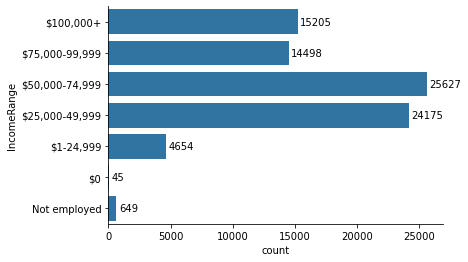

In [15]:
sb.countplot(data=loan, y='IncomeRange', color=base_color);
sb.despine(top=True, right=True)
for i in reversed(range(income_counts.shape[0])):
    count = income_counts[i]
    plt.text(count+200, i, count, va='center')

In [16]:
states = list(loan['BorrowerState'].value_counts().index)

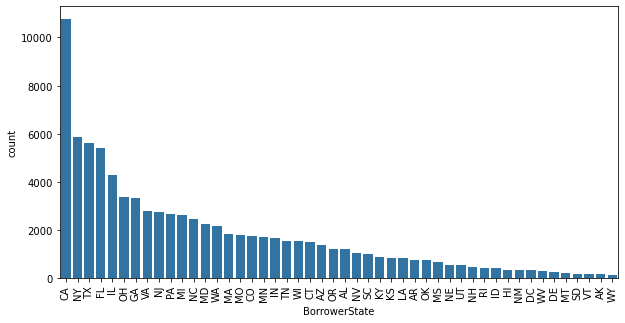

In [17]:
plt.figure(figsize=[10, 5])
sb.countplot(data=loan, x='BorrowerState', order=states, color=base_color)
plt.xticks(rotation=90);

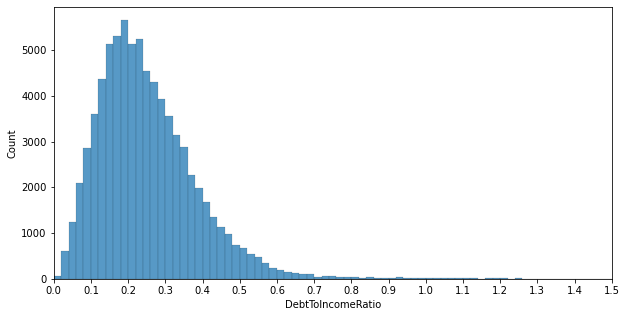

In [18]:
plt.figure(figsize=[10, 5])
bin_edges = np.arange(0, loan['DebtToIncomeRatio'].max()+0.02, 0.02)
ax = sb.histplot(data=loan, x='DebtToIncomeRatio', bins=bin_edges)
ax.set_xlim(0, 1.5)
plt.xticks(np.arange(0, 1.6, 0.1));

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The debt to income ratio has a unusually large maxmium value, so a xlim was set to exclude that value from the plot.\
> The 0 dollar level of the income range has a count value so low that its bar is not visible, so text annotations were used.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The rows with a NaN value in the Prosper rating column and the borrower APR column were dropped.\
> Also any columns with significantly less non-null rows than the Prosper rating column were dropped.\
> The investigated distributions appear to be not unusual. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

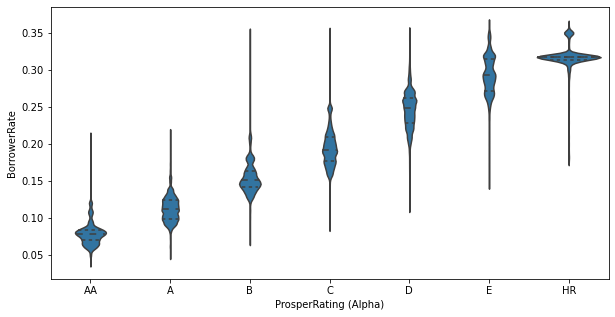

In [19]:
plt.figure(figsize=[10, 5])
sb.violinplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color, inner='quartiles');

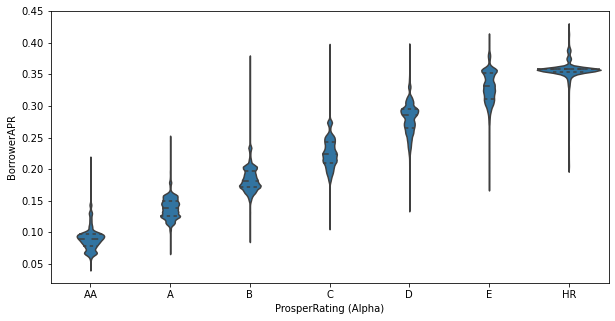

In [20]:
plt.figure(figsize=[10, 5])
sb.violinplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color, inner='quartiles');

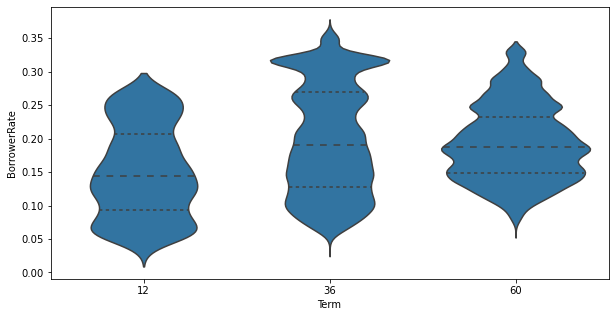

In [21]:
plt.figure(figsize=[10, 5])
sb.violinplot(data=loan, x='Term', y='BorrowerRate', color=base_color, inner='quartiles');

In [22]:
num_list = list(loan.select_dtypes(include=['float64', 'int64']).columns)
num_list.remove('BorrowerRate')

In [23]:
len(num_list)

51

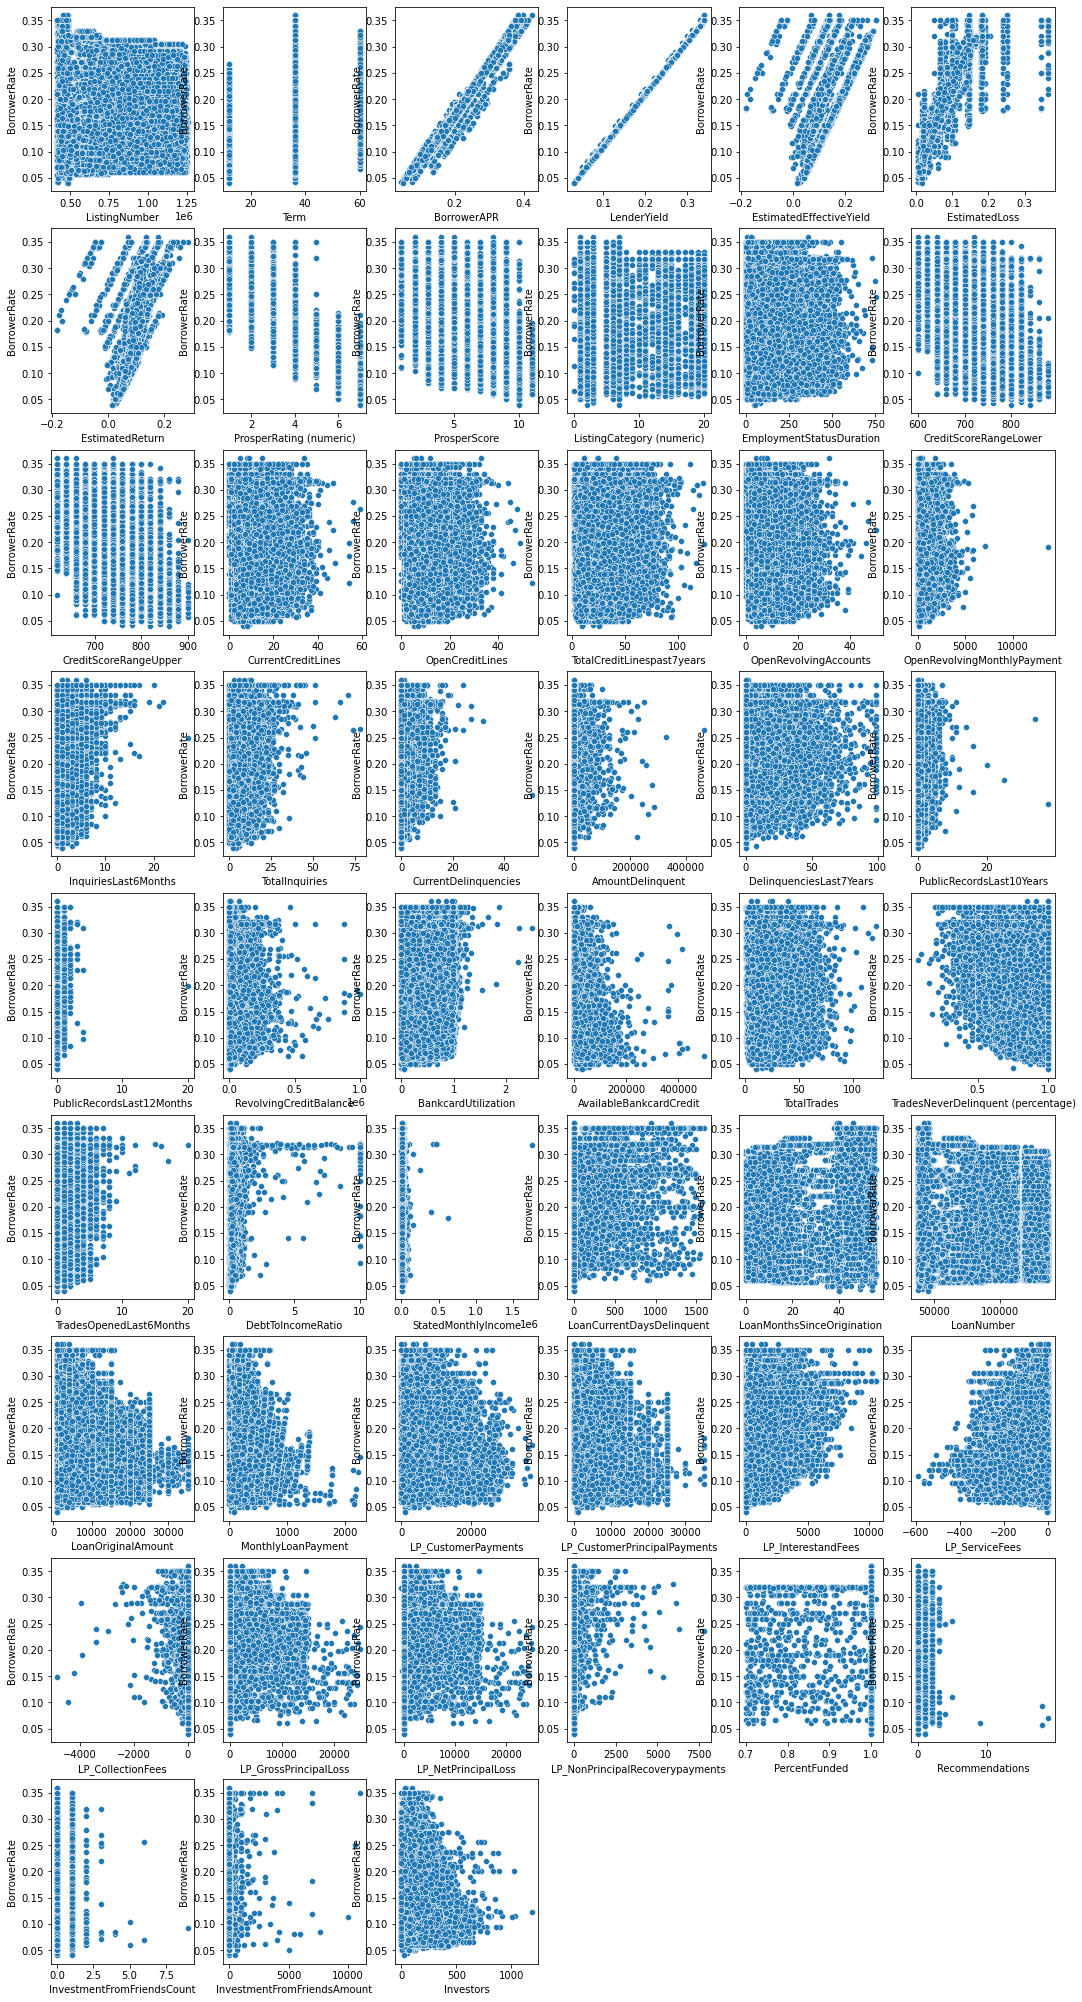

In [24]:
plt.figure(figsize = [18, 36])
i = 1
for col in num_list:
    plt.subplot(9, 6, i)
    sb.scatterplot(data=loan, x=col, y='BorrowerRate')
    i=i+1;

In [25]:
plt.figure(figsize = [10, 5])
sb.scatterplot(data=loan, x='EstimatedEffectiveYield', y='BorrowerRate');

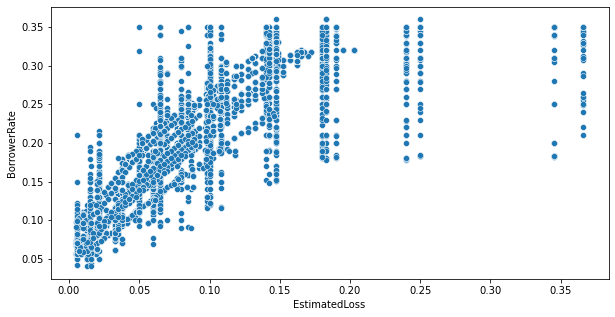

In [26]:
plt.figure(figsize = [10, 5])
sb.scatterplot(data=loan, x='EstimatedLoss', y='BorrowerRate');

In [27]:
print(loan['BankcardUtilization'].min(),
      loan['BankcardUtilization'].max(),
      loan['CreditScoreRangeUpper'].min(),
      loan['CreditScoreRangeUpper'].max())

0.0 2.5 619.0 899.0


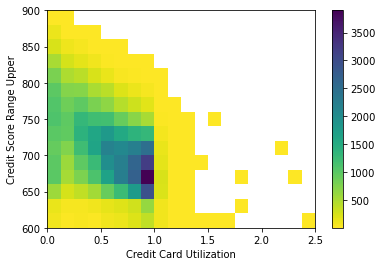

In [28]:
bins_x = np.arange(0, 2.5+0.125, 0.125)
bins_y = np.arange(600, 900+20, 20)
plt.hist2d(data = loan, x = 'BankcardUtilization', y = 'CreditScoreRangeUpper', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Credit Card Utilization')
plt.ylabel('Credit Score Range Upper');

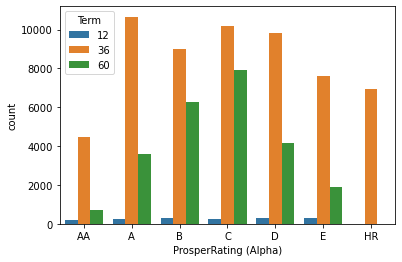

In [29]:
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'Term');

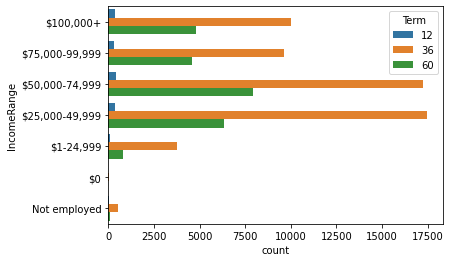

In [30]:
sb.countplot(data = loan, y = 'IncomeRange', hue = 'Term');

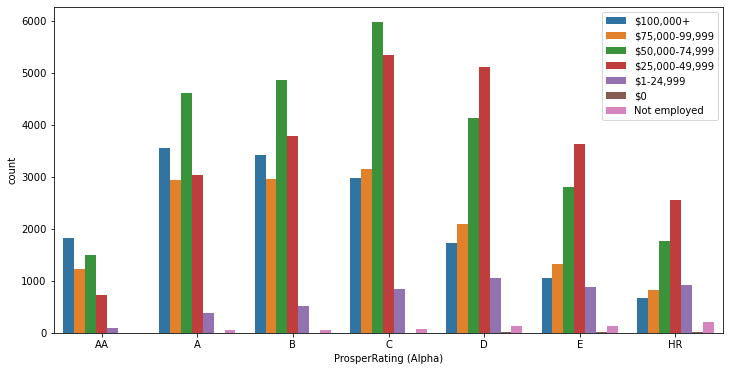

In [31]:
plt.figure(figsize = [12, 6])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'IncomeRange')
plt.legend(fontsize=10);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. A higher Prosper rating comes with a lower borrower rate and APR.
> 2. The borrower rate is positively correlated with the estimated effective yield and the estimated loss.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. A credit card holder is more likely to get a high credit score when he/she utilizes the credit card at a low percentage.
> 2. The majority of the loans have a 36 months term, and it's also true within each Prosper rating level and each income range.
> 3. Higher income tends to lead to higher Prosper ratings:\
  On AA level, the highest income range has the most count\
  On A, B, and C level, the third highest income range has the most count\
  On D, E, and HR level, the fourth highest income range has the most count.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

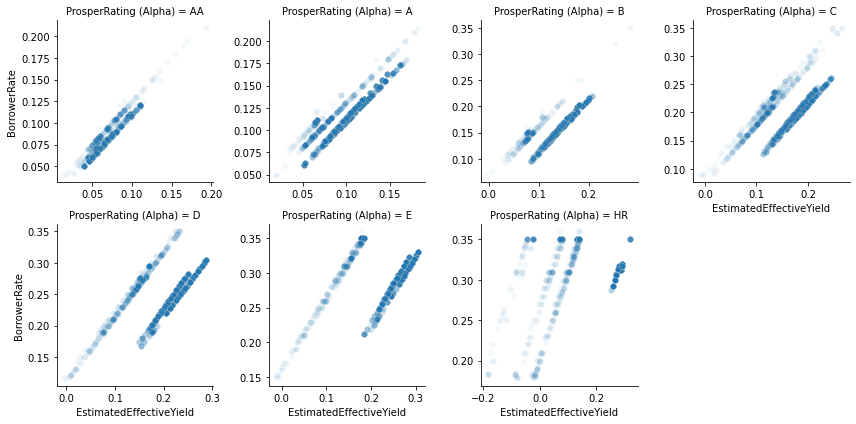

In [32]:
g = sb.FacetGrid(data=loan, col='ProsperRating (Alpha)', col_wrap=4, sharey=False, sharex=False)
g.map(sb.scatterplot, 'EstimatedEffectiveYield', 'BorrowerRate', alpha=1/20);

In [33]:
gg = sb.FacetGrid(data=loan, col='LoanStatus', col_wrap=4, sharey=False, sharex=False)
gg.map(sb.scatterplot, 'EstimatedLoss', 'BorrowerRate', alpha=1/30);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The positive correlation between the borrower rate and the estimated effective yield can be separated to sub groups by the Prosper ratings, and each sub group seems to have its sub groups which may require more information to find out. 

### Were there any interesting or surprising interactions between features?

> The positive correlation between the borrower rate and the estimated loss can be separated to sub groups by the loan status, and in two of the sub groups, completed and charged off, some observations don't fall into the correlation, which may require more information to find out why.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

